In [1]:
using Pkg

using JSON
using SolidStateDetectors
using Unitful
using Plots
using LegendHDF5IO

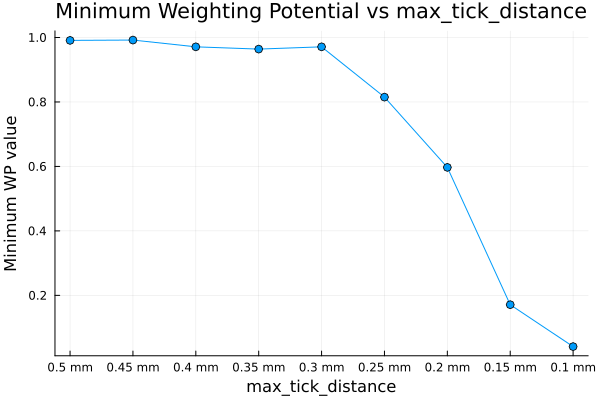

In [ ]:

# Dati numerici
max_tick_array = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
minmum_wp = [0.991, 0.992, 0.971, 0.964, 0.971, 0.815, 0.597, 0.171, 0.041]

# Etichette personalizzate
xtick_labels = ["0.5 mm", "0.45 mm", "0.4 mm", "0.35 mm", "0.3 mm", "0.25 mm", "0.2 mm", "0.15 mm", "0.1 mm"]

plot(max_tick_array, minmum_wp,
     xlabel="max_tick_distance", 
     ylabel="Minimum WP value",
     legend=false,
     marker=:o,
     title="Minimum Weighting Potential vs max_tick_distance",
     xticks=(max_tick_array, xtick_labels),
     xflip = true)  # questo inverte l'asse X